In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output


In [54]:
def show_img(img, bigger=False):
    if bigger:
        plt.figure(figsize=(15,15))
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [55]:
def mouse_handler(event, x, y, flags, data):
    if event == cv2.EVENT_LBUTTONDOWN:
        # 標記點位置
        cv2.circle(data['img'], (x,y), 3, (0,0,255), -1) 

        # 改變顯示 window 的內容
        cv2.imshow("Image", data['img'])
        
        # 顯示 (x,y) 並儲存到 list中
        print("get points: (x, y) = ({}, {})".format(x, y))
        data['points'].append((x,y))

def get_points(img):
    # 建立 data dict, img:存放圖片, points:存放點
    data = {}
    data['img'] = img.copy()
    data['points'] = []
    
    # 建立一個 window
    cv2.namedWindow("Image", 0)
    
    # 改變 window 成為適當圖片大小
    h, w, dim = img.shape
    print("img height, width: ({}, {})".format(h, w))
    cv2.resizeWindow("Image", w, h)
        
    # 顯示圖片在 window 中
    cv2.imshow('Image',img)
    
    # 利用滑鼠回傳值，資料皆保存於 data dict中
    cv2.setMouseCallback("Image", mouse_handler, data)
    
    # 等待關閉視窗，藉由 OpenCV 內建函數釋放資源
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # 回傳點 list
    return data['points']

origin image: 


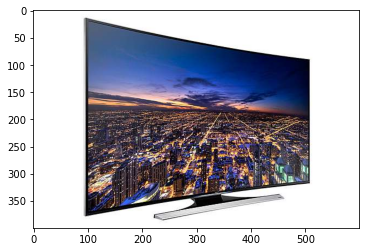

Click on four corners of bllboard and the press ENTER
img height, width: (400, 600)
get points: (x, y) = (119, 56)
get points: (x, y) = (443, 125)
get points: (x, y) = (439, 277)
get points: (x, y) = (199, 276)
photo scanner result: 


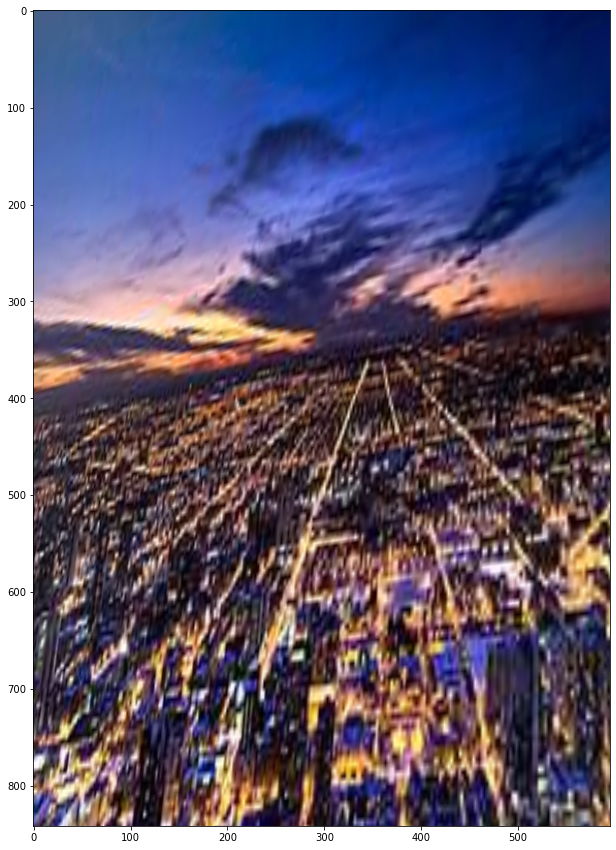

In [59]:
#Read the destination image
ori_img = cv2.imread("./testdata/tv.jpg")
print("origin image: ")
show_img(ori_img)

print("Click on four corners of bllboard and the press ENTER")
points = get_points(ori_img)
pts1 = np.float32(points) 


target_height = 842 # A4
target_width = 595 # A4
pts2 = np.float32([[0,0],[target_width,0],[target_width,target_height],[0,target_height]])

# 計算最佳變形矩陣
M = cv2.getPerspectiveTransform(pts1, pts2)

# 將原圖使用變形矩陣做透視變換
res = cv2.warpPerspective(ori_img, M, (target_width, target_height))

print("photo scanner result: ")
show_img(res, bigger=True)

# Reference

https://blog.csdn.net/on2way/article/details/46801063



